<a href="https://colab.research.google.com/github/moiroudelliott/hough/blob/main/Hough_na%C3%AFf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Hough : **Algo Naïf**

### *I/ Préparation*

Mounted at /content/drive


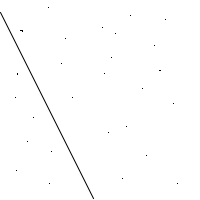

In [ ]:
# Les modules :

from google.colab import drive
import sys
import math
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Accès au fichiers du drives :

drive.mount('/content/drive')

# Importation de l'image :, 

path='/content/drive/My Drive/python/test.png'
img = cv.imread(path)
cv2_imshow(img)

### *II/ Passage dans l'espace (a, b) de Hough :*

###### Pour cela nous allons tout d'abord avoir besoin d'une fonction qui est capable de tracer des droites dans une matrice en augmentant de 1 les valeurs par lesquelles elle passe.

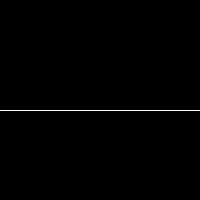

In [ ]:
def tracerLigne(img:list, x:int, y:int, incr:int)->list:

  # On récupère les dimensions de l'image en question
  larg = len(img[0])
  haut = len(img)

  for a in range(larg): # On démare une boucle sur toute la largeur

    b = - x * (a - larg // 2) + y # Puis on calcule notre b avec la formule : b = -xa + y
    # (On soustrait à a la largeur divisée par 2 pour décaler l'axe des abscises au centre de l'image.)

    # Ensuite nous vérifions si b se trouve bien dans la matrice, si non on ne trace pas pour éviter un out of range.
    if b > -haut//2 and b < haut//2: 
      img[b-(haut // 2)][a] += incr # Ici on incrémente la valeur de incr aux coordonnées.
    # (Cette fois nous divisions par 2 pour décaler l'axe des ordonnées)

    # Ensuite, comme nous voulons une droite continue, nous allons remplir entre les points dispersés dessinnés ci-dessus.
    nextB=y-x*((a+1)-larg//2) # Ici on calcule le b pour le prochain x.

    while nextB!=b: # Puis, tant que ce prochain b reste inférieur au b actuel, on va tracer un b en dessous sur le même a.

      b = b - 1

      # On vérifie encore une fois que b est bien dans la matrice avant de tracer.
      if b - (haut // 2) <= -haut or b - (haut // 2) >= 0:
        b = nextB
        pass 
      else: img[b-(haut // 2)][a] += incr

  return img

# Création d'une image noire 200x200
img_test = np.zeros((200, 200), dtype=np.uint8)

# Appel de la fonction
img_test = tracerLigne(img_test, 0, 10, 255)

cv2_imshow(img_test)


###### Ensuite nous allons créer la fonction principale qui va nous premettre de créer une matrice de l'espace de Hough en utilisant la fonction ci dessus.

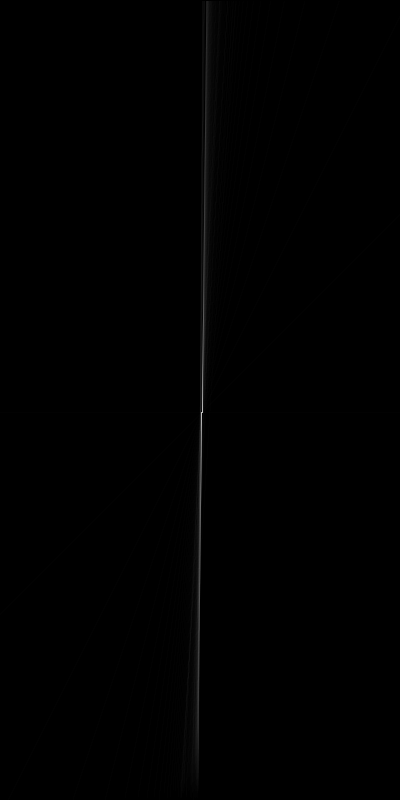

In [ ]:
def changementPlan(img:list, incr:int)->list:

  # On récupère la taille de l'image d'origine.
  larg=len(img[0])
  haut=len(img)

  # Puis nous créons une matrice faisant 4 fois la hauteur et 2 fois la largeur de l'image d'origine.
  res = np.zeros((haut * 4, larg *  2), dtype=np.uint8)

  # Ensuite nous allons boucler sur tous les pixels de l'image d'origine en passant par tous les x et y.
  for x in range(larg):
    for y in range(haut):

      # Pour le moment nous n'utilisons que des dessins noir sur font blanc donc on va vérifier si le pixel est sombre.
      if img[y][x][0] < 100:

        # Si c'est le cas nous traçons une droite avec comme coéfficient directeur x et comme offset y.
        res = tracerLigne(res, x, y, incr)

  return res

# Regardons le résultat pour l'image importée au début :
img_hough = changementPlan(img, 2)

# Nous affichons la matrice, plus un pixel est clair, plus le nombre de droite qui le traverse est grand
cv2_imshow(img_hough)

######*Nous voyons ici que toutes les droites se croisent au centre de l'image car c'est clairement le point le plus clair, l'idée est de prendre le point le plus clair de l'image c'est à dire avec la plus grande valeur et d'utiliser les indices du pixel pour tracer une droite sur notre image d'origine.*

### III/ Détection du point le plus clair :

In [ ]:
def coordonneesMax(img):

  # On définis comme mémoire d'origine le point (0, 0).
  res=(0, 0)

  # Puis nous allons boucler sur tous les pixels de l'image.
  for y in range(len(img)):
    for x in range(len(img[0])):

      # Si le point aux indices est plus clair que celui qu'on avais en mémoire, on le passe en mémoire.
      if img[y][x] > img[res[1]][res[0]]:
        res = (x, y)

  return res

# Nous allons tester la fonction avec la matrice trouvée ci-dessus :
coordonnees_max = coordonneesMax(img_hough)
print(coordonnees_max)

(201, 412)


###IV/ Tracage de la droite sur l'image d'origine.

######Nous allons enfin utiliser les coordonnées trouvées grâce à la fonction ci-dessus comme coeeficient directeur et offset pour tracer une droite sur l'image d'origine


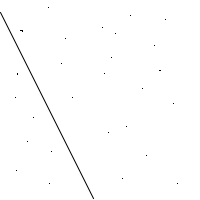

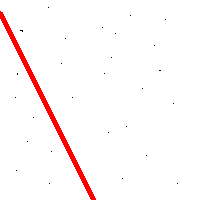

In [ ]:
# Nous allons commencer par récupérer la taille de l'image.
larg = len(img[0])
haut = len(img)

# Puis nous allons remettre les coordonnées trouvée au dessus à l'échelle.
a = coordonnees_max[0] - (larg - 1)
b = coordonnees_max[1] - ((haut * 2) - 1)
# (J'ajoute - 1 car les indices commencent à 0)

# Enfin nous allons calculer deux points des deux côtés de l'image avec ces a et b pour pouvoir tracer une droite.
pt1 = (0, 0 * a + b)
pt2 = (larg, larg * a + b)

# Nous allons enfin utiliser la fonction intégrée de OpenCV qui prend en entrée 2 points et nous trace une droite passant par ceux-ci
imgv2 = np.copy(img)
img_finale = cv.line(imgv2, pt1, pt2, (0, 0, 255), 3)

cv2_imshow(img)
print("=======================")
cv2_imshow(img_finale)

######*Ici la droite sur l'image à été tracée pour avoir un coefficient a entier, regardons quel résultat nous obtenons pour un coefficient a à virgule.*

### V/ Une droite avec a non entier.

######Cette fois la droite qu'on importe à un coéfficient directeur de 1.2.

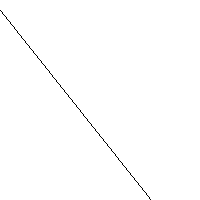

In [ ]:
path2 = '/content/drive/My Drive/python/test2.png'
img2 = cv.imread(path2)
cv2_imshow(img2)

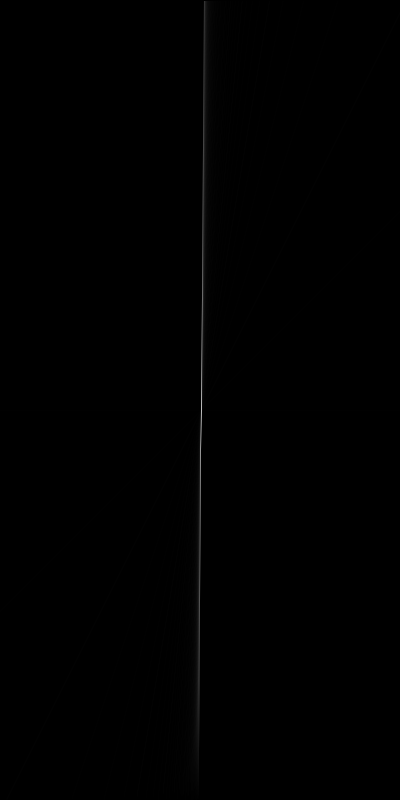

In [ ]:
img2_hough = changementPlan(img2, 1)
cv2_imshow(img2_hough)

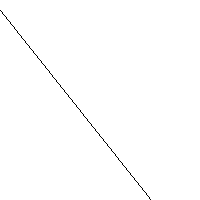

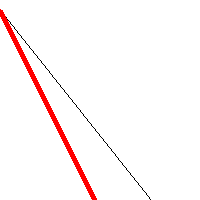

In [ ]:
larg = len(img[0])
haut = len(img)

coordonnees_max = coordonneesMax(img2_hough)
a = coordonnees_max[0] - (larg - 1)
b = coordonnees_max[1] - ((haut * 2) - 1)

pt1 = (0, 0 * a + b)
pt2 = (larg, larg * a + b)

img2v2 = np.copy(img2)
img_finale2 = cv.line(img2v2, pt1, pt2, (0, 0, 255), 3)

cv2_imshow(img2)
print("==========================")
cv2_imshow(img_finale2)

######*On vois que le b est correct mais le a ne l'est clairement pas, ici nous avons un coefficient directeur qui est le même que pour la droite précedente c'est à dire 2.*

###VI/ Fonction intégrée

###### Nous allons maintenant tester la fonction intégrée de OpenCV cv.HoughLinesP sur l'image d'une sudoku.

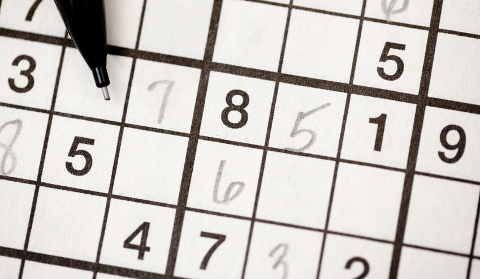

In [ ]:
# J'imposte donc une image de sudoku :
path3 = '/content/drive/My Drive/python/sudoku.jpg'
sudoku = cv.imread(path3)
cv2_imshow(sudoku)

###### Ensuite je vais modifier l'image avant de la passer dans la fonction de Hough, je vais griser l'image et utiliser la fonction Canny de openCV.

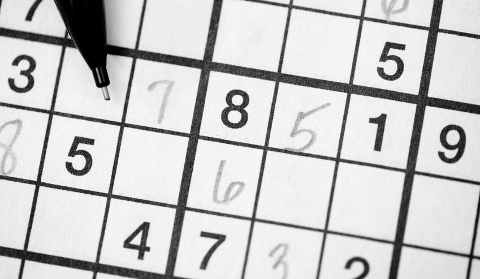

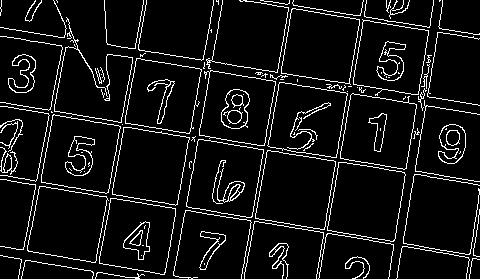

In [ ]:
# Je commence par griser l'image :
gray=cv.cvtColor(sudoku, cv.COLOR_BGR2GRAY)

cv2_imshow(gray)
print("==============================================================")

# Puis j'effectue la détection de contour canny :
canny = cv.Canny(gray, 50, 200, None, 3)

cv2_imshow(canny)

###### Puos nous allons passer cette image dans la fonction Hough de openCV.

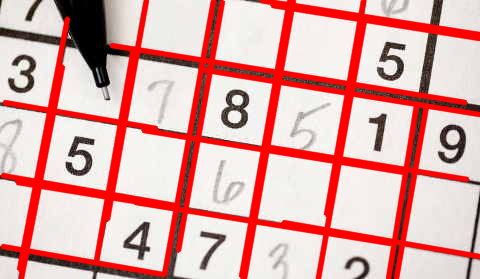

In [ ]:
# Je récupère les coordonnées des points pour tracer les lignes grâce à la fonction de opencv
linesP = cv.HoughLinesP(canny, 1, np.pi / 180, 100, None, 100, 10)

# Je commence par vérifier que des lignes ont bien étés détectées
if linesP is None:
  print("Aucune lignes détectées")
else :
  # Si il y a bien des lignes, je boucle et trace des segments entre tous les points données dans linesP
  for line in linesP:
    x1, y1, x2, y2 = line[0]
    cv.line(sudoku, (x1, y1), (x2, y2), (0, 0, 255), 3, cv.LINE_AA)

cv2_imshow(sudoku)